In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from functools import partial

In [2]:
plt.style.use("presentation.mplstyle")

In [3]:
def kernel_rbf(X1: np.array, X2: np.array, sigma: float, length_scale: float) -> np.array:
    """rbf kernel implementation ref. Schulz et al. (2018) jmp tutorial paper"""
    dist_eucl = np.sqrt(np.sum(np.abs(X1 - X2)**2))
    return sigma**2 * np.exp(-(dist_eucl / 2*length_scale**2))

In [4]:
X_train = pd.merge(
    pd.DataFrame({
        "x1": np.arange(0, 12)
    }),
    pd.DataFrame({
        "x2": np.arange(0, 12)
    }),
    how="cross"
)

In [5]:
l_X_train_1 = list(np.repeat(X_train.to_numpy(), X_train.shape[0], 0))
l_X_train_2 = list(np.tile(X_train.to_numpy().T, X_train.shape[0]).T)

In [6]:
kernel_rbf_partial = partial(kernel_rbf, sigma=1, length_scale=0.5)
l_similarities = list(map(kernel_rbf_partial, l_X_train_1, l_X_train_2))

In [7]:
df_similarities = pd.DataFrame(np.reshape(np.array(l_similarities), (X_train.shape[0], X_train.shape[0])))

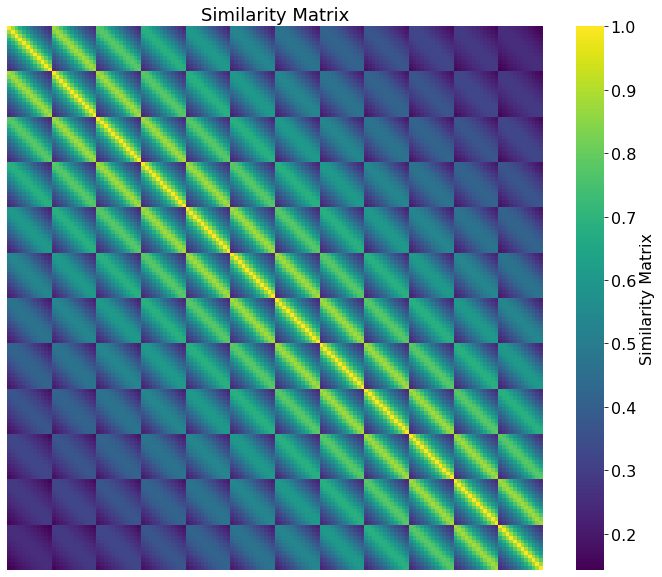

In [8]:
f, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(
    df_similarities, cmap="viridis", ax=ax, 
    yticklabels=False, xticklabels=False, 
    cbar_kws={'label': "Similarity Matrix"}
)
_ = plt.title("Similarity Matrix")

In [9]:
np.random.seed(123)
X_train["y"] = np.random.multivariate_normal(np.repeat(0, df_similarities.shape[0]), df_similarities.to_numpy())

In [10]:
df_heatmap = X_train.pivot(index="x1", columns="x2", values="y")

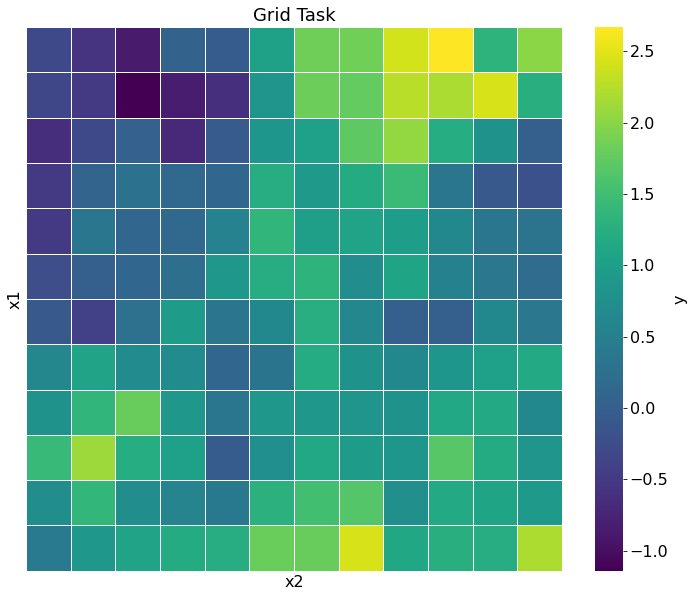

In [22]:
f, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(
    df_heatmap, cmap="viridis", ax=ax, annot=False, linewidths=1,
    yticklabels=False, xticklabels=False,
    cbar_kws={"label": "y"}
)
_ = plt.title("Grid Task")
plt.savefig("2022-04-25-grid-task.png", dpi=35)